In [11]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

* 타원을 그리기위한 매개변수 생성

In [5]:
img = np.full((512, 512, 3), 255, np.uint8)
# 타원의 크기
axes = (int(256*random.uniform(0, 1)), int(256*random.uniform(0, 1)))
# 타원의 회전각
angle = int(180*random.uniform(0, 1))
center = (256, 256)

* 타원 생성하고 노이즈를 추가한다

In [7]:
pts = cv2.ellipse2Poly(center, axes, angle, 0, 360, 1)
pts += np.random.uniform(-10, 10, pts.shape).astype(np.int32)

* 선에 원을 추가한다

In [10]:
cv2.ellipse(img, center, axes, angle, 0, 360, (0, 255, 0), 3)

for pt in pts:
    cv2.circle(img, (int(pt[0]), int(pt[1])), 3, (0, 0, 255))

cv2.imshow('Fit ellipse', img)
cv2.waitKey()
cv2.destroyAllWindows()

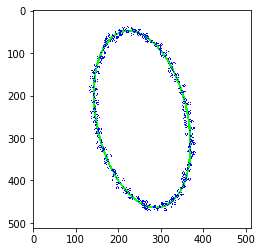

In [12]:
plt.imshow(img)

* 노이즈인 점들의 집합을 타원으로 연결한다.

In [13]:
ellipse = cv2.fitEllipse(pts)
cv2.ellipse(img, ellipse, (0, 0, 0), 3)

cv2.imshow('Fit ellipse', img)
cv2.waitKey()
cv2.destroyAllWindows()

* fitEllipse - > 중심점,반축길이,회전각도 리턴

In [18]:
ellipse

((256.0308837890625, 256.08038330078125),
 (217.12765502929688, 421.9125061035156),
 168.14791870117188)

In [15]:
img = np.full((512, 512, 3), 255, np.uint8)

pts = np.arange(512).reshape(-1, 1)
pts = np.hstack((pts, pts))
pts += np.random.uniform(-10, 10, pts.shape).astype(np.int32)

In [16]:
cv2.line(img, (0,0), (512, 512), (0, 255, 0), 3)

for pt in pts:
    cv2.circle(img, (int(pt[0]), int(pt[1])), 3, (0, 0, 255))

cv2.imshow('Fit line', img)
cv2.waitKey()
cv2.destroyAllWindows()

* cv2.fitLine -> 파라미터 : 점의 집합, 최소화를 위한 거리함수 타입,거리함수 제어할 값, 직선 계수에 대한 허용정확도

In [17]:
vx,vy,x,y = cv2.fitLine(pts, cv2.DIST_L2, 0, 0.01, 0.01)
y0 = int(y - x*vy/vx)
y1 = int((512 - x)*vy/vx + y)
cv2.line(img, (0, y0), (512, y1), (0, 0, 0), 3)

cv2.imshow('Fit line', img)
cv2.waitKey()
cv2.destroyAllWindows()